In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import graphviz
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv("lending%20club_scailing%20(2).csv")
df.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt', 'term1','total_rec_prncp'], axis=1, inplace=True)
ddf = pd.read_csv("lending%20club_undummies_outlier%20(2).csv")
df2 = ddf[['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp']]
df = pd.concat([df,df2],axis=1)
df

,loan_amount,annual_income,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,fico_score,funded_amount,interest_rate,installment,total_pymnt,term1,total_rec_prncp
0,0.282051,0.001437,0.204163,0.000000,0.125,0.049383,0.000000,0.002215,0.045388,0.105263,...,0.0,0.111111,0.0,0.161725,12000.0,0.0789,375.43,9735.810000,1.0,5646.56
1,0.333333,0.000705,0.348279,0.034483,0.000,0.098765,0.000000,0.004016,0.074414,0.093567,...,0.6,0.666667,0.4,0.053908,14000.0,0.1147,461.47,16376.889160,1.0,14000.00
2,0.589744,0.001426,0.234788,0.068966,0.000,0.061728,0.000000,0.007416,0.053121,0.046784,...,0.0,0.222222,0.0,0.000000,24000.0,0.1147,791.09,28435.239310,1.0,24000.00
3,0.333333,0.001836,0.146317,0.000000,0.125,0.185185,0.000000,0.006424,0.044940,0.116959,...,0.0,0.111111,0.0,0.000000,14000.0,0.0949,448.40,16034.225380,1.0,14000.00
4,0.333333,0.001230,0.486789,0.000000,0.250,0.197531,0.000000,0.010126,0.059845,0.163743,...,0.0,0.111111,0.0,0.134771,14000.0,0.0999,451.68,14954.260000,1.0,14000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767951,0.794872,0.001426,0.548239,0.000000,0.000,0.160494,0.000000,0.035611,0.091113,0.087719,...,0.0,0.000000,0.0,0.404313,32000.0,0.1875,825.71,40999.670000,0.0,32000.00
767952,0.589744,0.001197,0.684548,0.000000,0.000,0.185185,0.000000,0.014972,0.094587,0.128655,...,0.0,0.000000,0.0,0.134771,24000.0,0.0692,740.18,26627.742300,1.0,24000.00
767953,0.076923,0.000360,0.506205,0.000000,0.250,0.172840,0.000000,0.001327,0.010310,0.140351,...,0.0,0.111111,0.0,0.700809,4000.0,0.0662,122.82,4361.030000,1.0,4000.00
767954,0.179487,0.000820,0.361689,0.068966,0.125,0.111111,0.029412,0.001290,0.041466,0.128655,...,0.3,0.111111,0.4,0.107817,8000.0,0.1288,269.09,8942.840225,1.0,8000.00


In [18]:
x = df.drop(['depvar'],axis=1)
y = df['depvar']

X_train1, X_test1, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state=45)
X_val1, X_test1, y_val, y_test = train_test_split(X_test1,y_test, test_size=0.5,random_state=45)

#뒤에 1 있는 변수들 : 목적함수 사용에 필요하지만, 모델 돌리는 데는 필요 없는 변수를 포함한 변수
X_train = X_train1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_test  = X_test1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)
X_val   = X_val1.drop(['funded_amount', 'interest_rate', 'installment', 'total_pymnt','term1','total_rec_prncp'], axis=1)

In [ ]:
# Decision Tree 모델 생성
clf = DecisionTreeClassifier(random_state=32)

# 하이퍼파라미터 그리드 설정
param_grid = {'criterion': ['gini','entropy'], 
              'max_depth': [None],
              'min_samples_split': [10,20,30,40,50],
              'min_samples_leaf': [2,4,6,8,10]}

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [19]:
clf = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 10, min_samples_split=50,random_state=45)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=50,
                       random_state=45)

---------

# 각각의 하이퍼 파라미터에서의 Score 값

In [11]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.793753,47,0.793348,0.794401,0.793641
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.808984,39,0.809061,0.808410,0.807433
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.820404,28,0.820259,0.820010,0.819153
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.827724,20,0.827324,0.827172,0.827595
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.833489,11,0.832944,0.832771,0.833422
5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.797258,46,0.796528,0.797927,0.795182
6,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.813153,35,0.813097,0.813228,0.810710
7,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.825098,23,0.824698,0.825066,0.823016
8,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.832618,14,0.832283,0.831892,0.831631
9,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.838161,7,0.837730,0.837426,0.837426


# Importance Features

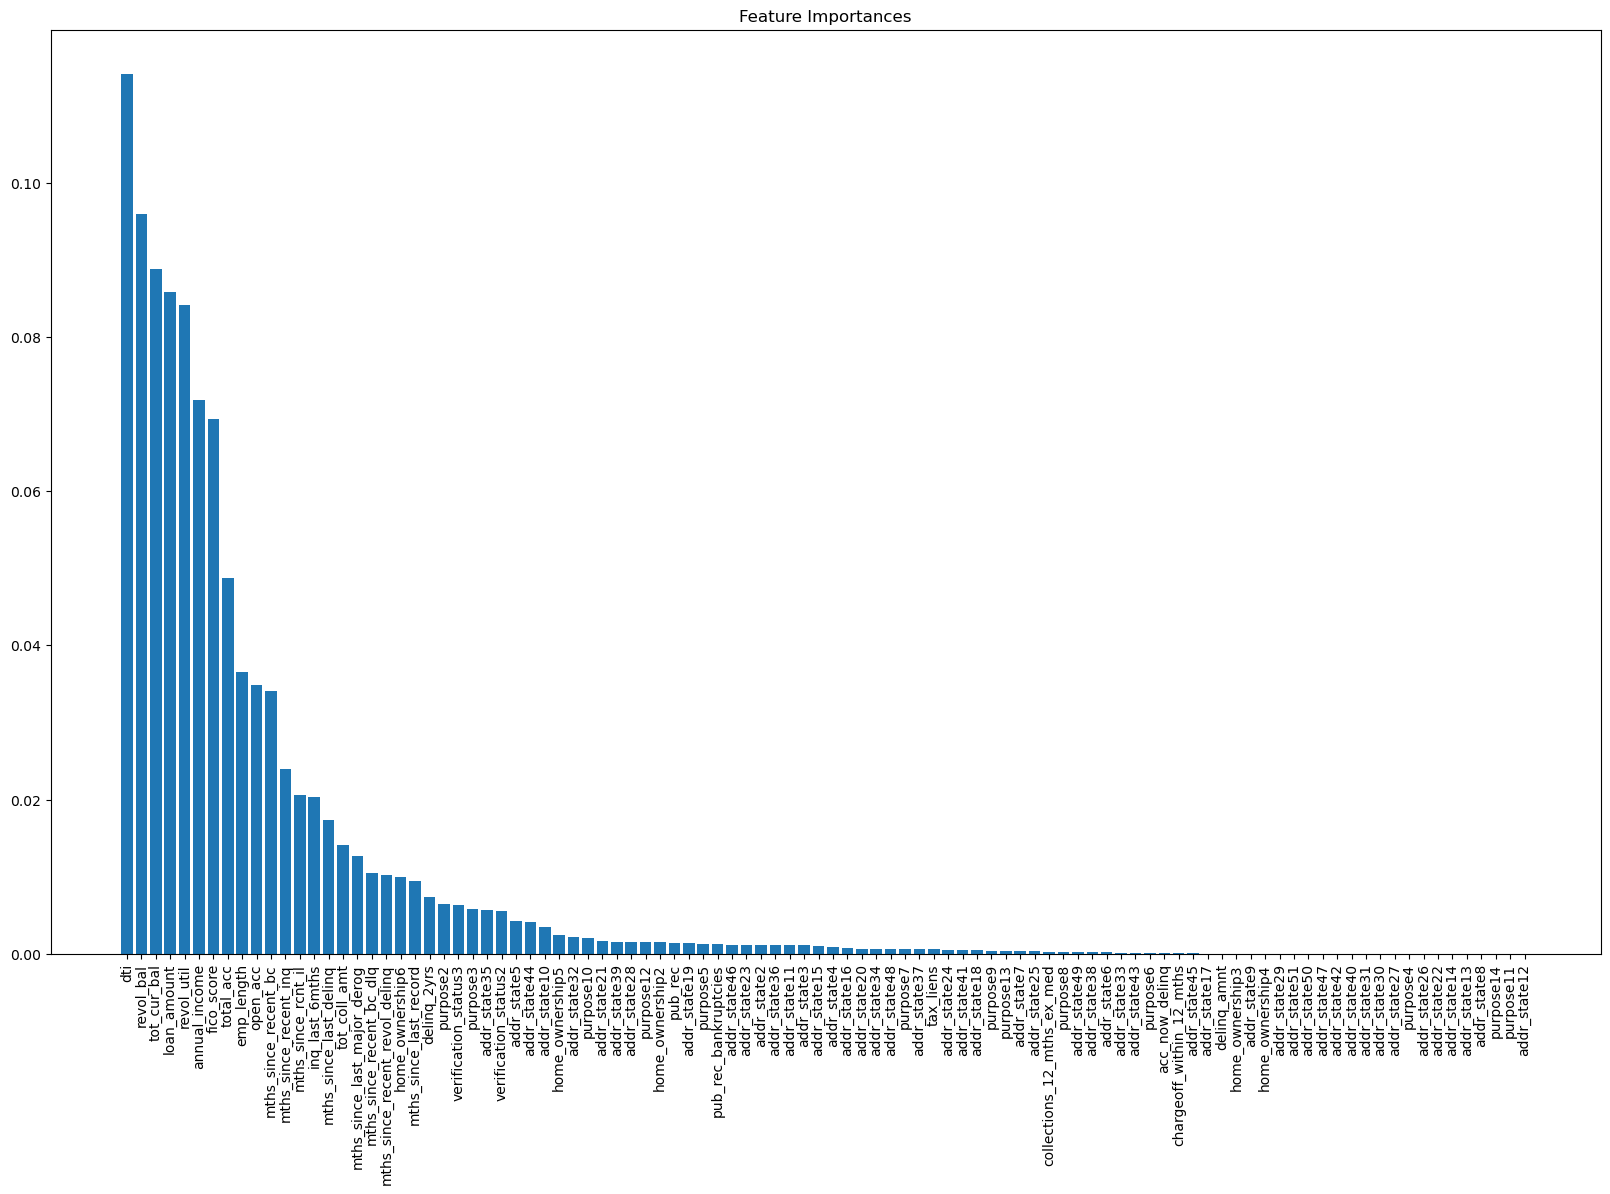

In [20]:
import matplotlib.pyplot as plt
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# 히스토그램 그리기
plt.figure(figsize=(20,12))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.show()


In [21]:
feature_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})
print(feature_df)

sorted_feature_df = feature_df.sort_values(by='importance', ascending=False)
print(sorted_feature_df)

                      feature_name  importance
0                      loan_amount    0.085836
1                    annual_income    0.071821
2                              dti    0.114133
3                      delinq_2yrs    0.007420
4                   inq_last_6mths    0.020295
..                             ...         ...
93            mths_since_recent_bc    0.034138
94        mths_since_recent_bc_dlq    0.010530
95           mths_since_recent_inq    0.023963
96  mths_since_recent_revol_delinq    0.010253
97                      fico_score    0.069357

[98 rows x 2 columns]
    feature_name  importance
2            dti    0.114133
7      revol_bal    0.095897
13   tot_cur_bal    0.088768
0    loan_amount    0.085836
8     revol_util    0.084155
..           ...         ...
62  addr_state26    0.000000
58  addr_state22    0.000000
44   addr_state8    0.000000
45   addr_state9    0.000000
49  addr_state13    0.000000

[98 rows x 2 columns]


In [22]:
sorted_feature_df

,feature_name,importance
2,dti,0.114133
7,revol_bal,0.095897
13,tot_cur_bal,0.088768
0,loan_amount,0.085836
8,revol_util,0.084155
...,...,...
62,addr_state26,0.000000
58,addr_state22,0.000000
44,addr_state8,0.000000
45,addr_state9,0.000000


-----

# Risk function - cutoff에 따른 risk 값 출력
### 사이에서 risk 값이 가장 낮다

In [23]:
# # 예측값 생성(Validation Set), histogram(frequency)
y_pred = clf.predict(X_val)
result = pd.DataFrame(clf.predict_proba(X_val)[:,1], columns=['pred_prob'])# y=1일 확률만을 이용하여 사용해야 함.

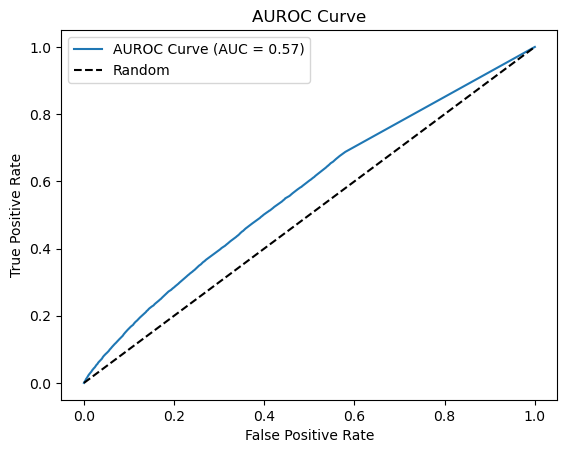

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob_test1=clf.predict_proba(X_test)[:,1]
# roc_curve 함수를 사용하여 FPR, TPR 값을 계산합니다.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_test1)

# roc_auc_score 함수를 사용하여 AUROC 값을 계산합니다.
roc_auc = roc_auc_score(y_test, y_pred_prob_test1)

# AUROC 곡선을 그립니다.
plt.plot(fpr, tpr, label=f'AUROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Frequency'>

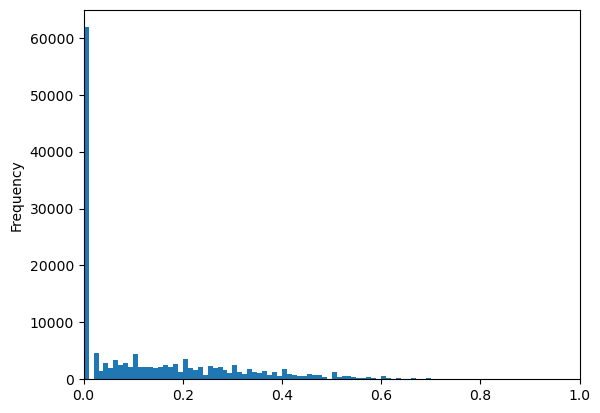

In [25]:
result = pd.DataFrame(clf.predict_proba(X_val)[:,1], columns=['pred_prob'])
result.pred_prob.plot(kind='hist',bins=100, xlim=([0,1]))
#plt.axvline(x=0.0689, color='red')

# Validation Set을 이용해 optimal threshold 잡기

In [86]:
from os import register_at_fork
# # 예측값 생성(Validation Set), histogram(frequency)
from sklearn.metrics import confusion_matrix

def risk(c1, c2, n, cut_off):
    result = pd.DataFrame(clf.predict_proba(X_val)[:,1], columns=['pred_prob'])# y=1일 확률만을 이용하여 사용해야 함.

    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0
    y_pred_prob=result['pred_prob']
    
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred_prob).ravel()  # Calculate confusion matrix
    return c1*fn + c2*fp  # Calculate risk value using given formula

c1 = 0.83
c2 = 0.17
n=153591

x = np.linspace(0, 1, num=11)  # 0.001 ~ 0.12 범위에서 num개의 값 생성
previous_risk = risk(c1,c2,n,0)
for num in x:
    num = round(num, 2)
    risk_value = risk(c1,c2, n, num)
    if previous_risk > risk_value:
        cutoff1 = num
        previous_risk = risk_value
    print(num, risk_value)
print(cutoff1)

0.0 22583.99
0.1 17856.02
0.2 17050.35
0.3 16677.69
0.4 16708.45
0.5 16859.219999999998
0.6 16999.14
0.7 17136.579999999998
0.8 17197.44
0.9 17213.36
1.0 17217.539999999997
0.3


In [87]:
#x = np.linspace(0, 0.1, num=11) 
x = np.linspace(cutoff1-0.1, cutoff1+0.1, num=21) 


previous_risk = risk(c1,c2, n,0)
for num in x:
    num = round(num, 3)
    risk_value = risk(c1,c2, n, num)
    if previous_risk > risk_value:
        cutoff = num
        previous_risk = risk_value
    print(num, risk_value)
print('cutoff:',cutoff)
print('risk:', risk(c1,c2, n, cutoff))

0.2 17050.35
0.21 16972.1
0.22 16918.25
0.23 16882.2
0.24 16825.57
0.25 16819.92
0.26 16801.74
0.27 16756.41
0.28 16713.370000000003
0.29 16689.379999999997
0.3 16677.69
0.31 16642.16
0.32 16644.6
0.33 16635.79
0.34 16664.37
0.35 16680.17
0.36 16676.84
0.37 16645.18
0.38 16668.61
0.39 16689.19
0.4 16708.45
cutoff: 0.33
risk: 16635.79


# optimal threshold를 이용해 만든 모델을 test set으로 분석하기

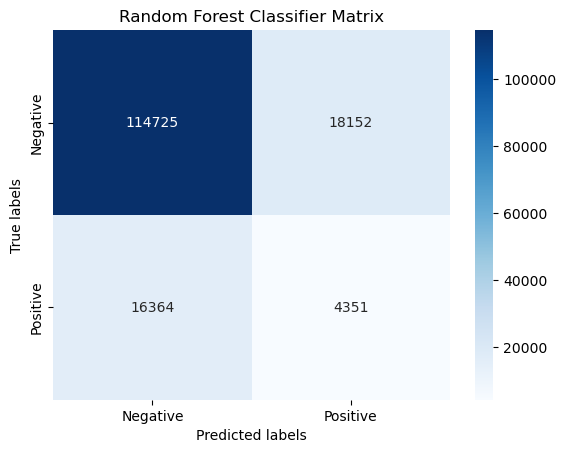

In [88]:
y_test_pred=clf.predict(X_test)
result_test= pd.DataFrame(clf.predict_proba(X_test)[:,1], columns=['pred_prob'])

result_test.pred_prob.plot(kind='hist',bins=100, xlim=([-1,1]))

def pred_prob(result,cut_off):
    for i in range(len(result)):
        if result.loc[i,'pred_prob']>=cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0

pred_prob(result_test, cutoff)
y_pred_prob_test=result_test['pred_prob']

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_curve



# y_test: 정답 레이블, y_pred_prob_test: 예측 결과 확률값
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_prob_test.round()).ravel()

# 혼동 행렬 시각화
labels = ['Negative', 'Positive']
cm = [[tn_test, fp_test], [fn_test, tp_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Random Forest Classifier Matrix')
plt.show()

In [89]:
precision = precision_score(y_test, y_pred_prob_test)
print(precision)

recall = recall_score(y_test, y_pred_prob_test)
print(recall)

f1 = f1_score(y_test, y_pred_prob_test)
print(f1)

accuracy = accuracy_score(y_test, y_pred_prob_test)
print(accuracy)

0.1933519975114429
0.21004103306782526
0.20135128881484568
0.7752747538934319



## 이익/손실 계산

In [90]:
def predict(cut_off): #threshold에 따른 predict dataframe 만들기
    result = pd.DataFrame(clf.predict_proba(X_val)[:,1], columns=['depvar_pred'])
    for i in range(len(result)):
        if result.loc[i,'depvar_pred']>=cut_off:
            result.loc[i,'depvar_pred']=1
        else:
            result.loc[i,'depvar_pred']=0
    return result['depvar_pred']

def loss(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([X_val1,y_val],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기

    w1=0; w2=0
    for idx in range(n):
        #부도를 내지 않을 것으로 예측했지만 부도를 낸 경우 손실 계산
        if validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            installment_ = validation['installment'][idx]
            if validation['term1'][idx] == 1:
                term = 36
            else:
                term = 60
            total_pymnt_ = validation['total_pymnt'][idx]
            num = installment_*term - total_pymnt_ #월별상환액*기간 - 부도직전상환액
            w1 += num
        
        #부도를 낼 것으로 예측했지만 부도를 내지 않은 경우 손실 계산
        elif validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 1:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            w2 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
    
    loss = w1 + w2
    return loss

def profit(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([X_val1,y_val],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기
    
    profit = 0 
    for idx in range(n):
        if validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            profit += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        
    return profit


def income(n,threshold):
    dep_pred = predict(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    validation = pd.concat([X_val1,y_val],axis=1)
    validation = validation.reset_index() #인덱스 0,1,2, ... 순으로 재정리하기. 다음 함수 실행할 때 필요함.
    validation = pd.concat([validation,dep_pred],axis=1)
    validation #원래의 X_validation 데이터프레임에 y_pred 값 이어붙이기
    
    profit = 0; loss = 0
    for idx in range(n):
        if validation['depvar'][idx] == 0 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            int_rate_ = validation['interest_rate'][idx]
            profit += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif validation['depvar'][idx] == 1 and validation['depvar_pred'][idx] == 0:
            funded_amnt_ = validation['funded_amount'][idx]
            total_rec_ = validation['total_rec_prncp'][idx]
            loss += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit-loss

n = 153591
print(loss(n,cutoff))
print(loss(n,cutoff)/n)
print(income(n,cutoff))
print(income(n,cutoff)/n)

179809738.70469368
1170.7049156831695
32668807.917503655
212.70001443771872


In [91]:
def predict_1(cut_off): #threshold에 따른 predict dataframe 만들기
    result1 = pd.DataFrame(clf.predict_proba(X_test)[:,1], columns=['depvar_pred'])
    
    #예측 확률이 cutoff이상인 경우, 예측을 1로, cutoff 미만인 경우 0으로 둔다.
    for i in range(len(result1)):
        if result1.loc[i,'depvar_pred']>=cut_off:
            result1.loc[i,'depvar_pred']=1
        else:
            result1.loc[i,'depvar_pred']=0
    return result1['depvar_pred']

def loss_1(n,threshold):
    #threshold 지정했을 때 y_pred값을 저장한 dataframe에 필요한 사후변수를 추가하는 과정
    dep_pred = predict_1(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    test = pd.concat([X_test1,y_test],axis=1)
    test = test.reset_index()
    test = pd.concat([test,dep_pred],axis=1)

    w1=0; w2=0
    for idx in range(n):
        #부도를 내지 않을 것으로 예측했지만 부도를 낸 경우 손실 계산
        if test['depvar'][idx] == 1 and test['depvar_pred'][idx] == 0:
            installment_ = test['installment'][idx]
            if test['term1'][idx] == 1:
                term = 36
            else:
                term = 60
            total_pymnt_ = test['total_pymnt'][idx]
            num = installment_*term - total_pymnt_ #월별상환액*기간 - 부도직전상환액
            w1 += num
        
        #부도를 낼 것으로 예측했지만 부도를 내지 않은 경우 손실 계산
        elif test['depvar'][idx] == 0 and test['depvar_pred'][idx] == 1:
            funded_amnt_ = test['funded_amount'][idx]
            int_rate_ = test['interest_rate'][idx]
            w2 += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
    
    loss_1 = w1 + w2
    return loss_1



def income_1(n,threshold):
    #threshold 지정했을 때 y_pred값을 저장한 dataframe에 필요한 사후변수를 추가하는 과정
    dep_pred = predict_1(threshold) #threshold 지정했을 때 y_pred값을 저장한 dataframe
    test = pd.concat([X_test1,y_test],axis=1)
    test = test.reset_index() 
    test = pd.concat([test,dep_pred],axis=1)
    
    profit = 0; loss = 0
    for idx in range(n):
        if test['depvar'][idx] == 0 and test['depvar_pred'][idx] == 0:
            funded_amnt_ = test['funded_amount'][idx]
            int_rate_ = test['interest_rate'][idx]
            profit += funded_amnt_*int_rate_ #이자금 (=총금액*이자율)
        elif test['depvar'][idx] == 1 and test['depvar_pred'][idx] == 0:
            funded_amnt_ = test['funded_amount'][idx]
            total_rec_ = test['total_rec_prncp'][idx]
            loss += funded_amnt_ - total_rec_ #대출금 - 월별상환액
        
    return profit-loss

n = 153591
print(loss_1(n,cutoff))
print(loss_1(n,cutoff)/n)
print(income_1(n,cutoff))
print(income_1(n,cutoff)/n)

179443470.64222342
1168.3202182564305
32308387.085000813
210.3533871450854


# 트리 시각화 - graphviz o

# 트리 시각화 - graphviz x

|--- debt_settlement_flag1 <= 0.50
|   |--- revol_bal <= 0.00
|   |   |--- purpose3 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- purpose3 >  0.50
|   |   |   |--- class: 1.0
|   |--- revol_bal >  0.00
|   |   |--- addr_state23 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- addr_state23 >  0.50
|   |   |   |--- open_acc <= 0.06
|   |   |   |   |--- class: 1.0
|   |   |   |--- open_acc >  0.06
|   |   |   |   |--- class: 1.0
|--- debt_settlement_flag1 >  0.50
|   |--- term1 <= 0.50
|   |   |--- fico_score <= 0.23
|   |   |   |--- tot_cur_bal <= 0.04
|   |   |   |   |--- dti <= 0.38
|   |   |   |   |   |--- mths_since_recent_bc <= 0.75
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- mths_since_recent_bc >  0.75
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- dti >  0.38
|   |   |   |   |   |--- inq_last_6mths <= 0.06
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- inq_last_6mths >  0.06
|   |   |   |   |   |   |--- class: 0.0
|   |   | 

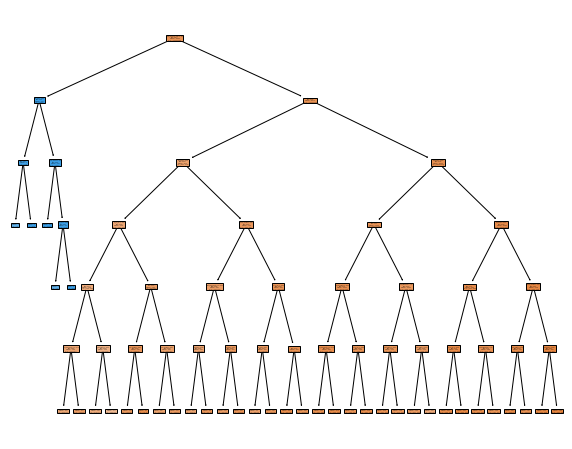

In [21]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Decision Tree 규칙 출력
tree_rules = export_text(clf, feature_names=list(X_train))
print(tree_rules)

# Decision Tree 시각화
plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=list(X_train), filled=True)
plt.show()

-----

# Test set-Confusion Matrix

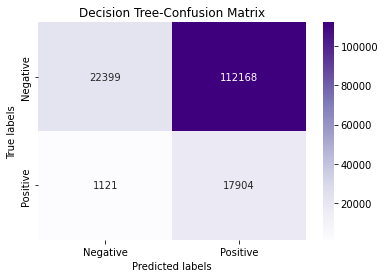

In [39]:
y_test_pred=clf.predict(X_test)
result_test= pd.DataFrame(clf.predict_proba(X_test)[:,1], columns=['pred_prob'])

result_test.pred_prob.plot(kind='hist',bins=100, xlim=([-1,1]))

def pred_prob(result,cut_off):
    for i in range(len(result)):
        if result.loc[i,'pred_prob']>cut_off:
            result.loc[i,'pred_prob']=1
        else:
            result.loc[i,'pred_prob']=0

pred_prob(result_test, 0.06894736842105262) #Cut-off 값
y_pred_prob_test=result_test['pred_prob']

import matplotlib.pyplot as plt
import seaborn as sns

# y_test: 정답 레이블, y_pred_prob_test: 예측 결과 확률값
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_prob_test.round()).ravel()

# 혼동 행렬 시각화
labels = ['Negative', 'Positive']
cm = [[tn_test, fp_test], [fn_test, tp_test]]

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap='Purples')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Decision Tree-Confusion Matrix')
plt.show()

-----

# Accuracy, Precision, Recall, F1  

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

a=accuracy_score(y_test, y_pred_prob_test)
print(a)

p = precision_score(y_test, y_pred_prob_test)
print(p)

r = recall_score(y_test, y_pred_prob_test)
print(r)

f1 = f1_score(y_test, y_pred_prob_test)
print(f1)

tpr_test = tp_test / (tp_test + fn_test)
fpr_test = fp_test / (fp_test + tn_test)
ri=(1 - tpr_test) * 0.66 + fpr_test * 0.34  
print(ri)


0.2624029897390489
0.13764684174918507
0.94107752956636
0.2401657981045896
0.3222950147661522
